In [167]:
import pandas as pd

df = pd.read_csv(r"C:\Users\mahil\OneDrive\Desktop\projects\walmart-sales-forecasting\data\walmart.csv")
df.info()
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [169]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [69]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df = df.sort_values(by='Date')


In [70]:
df.Store.unique()

array([ 1, 10, 37, 17, 30, 25, 22, 23, 24, 19, 21, 26, 39,  8, 32, 15, 34,
       13, 38,  9,  2, 45, 20, 27, 41,  4, 31, 16, 11, 36, 42,  5, 43, 35,
       28,  6, 33, 44, 18,  3, 12, 29, 40,  7, 14])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

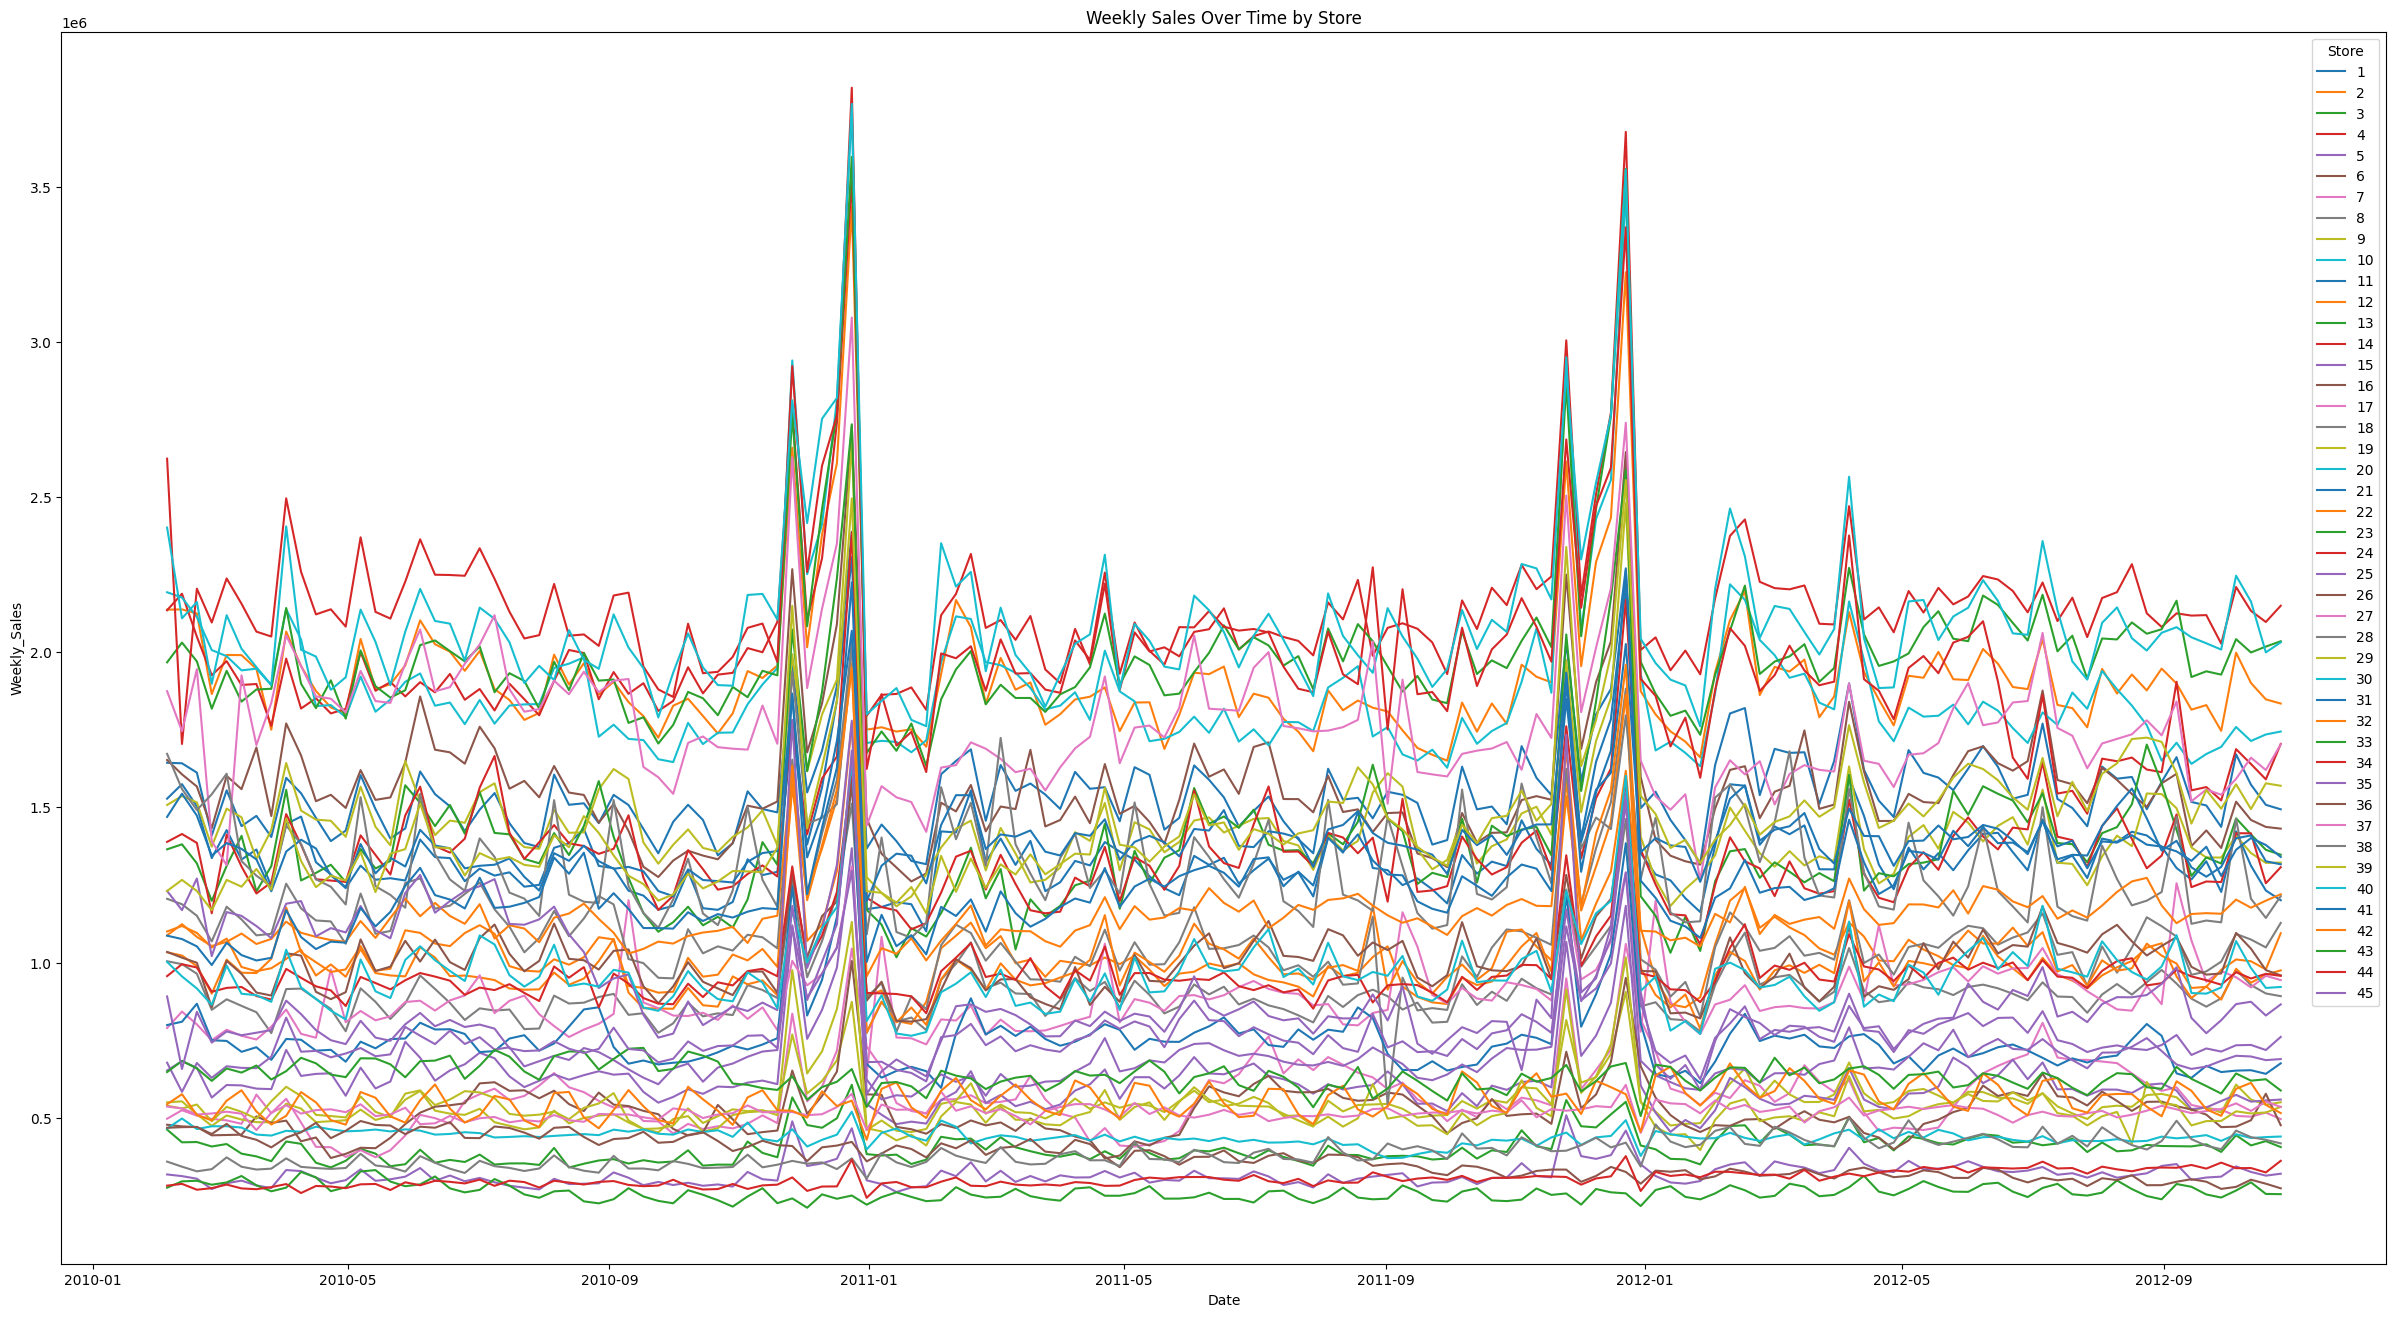

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 16))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', hue='Store', palette='tab10')
plt.title('Weekly Sales Over Time by Store')
plt.show

Text(0.5, 1.0, 'Weekly Sales vs Temperature ')

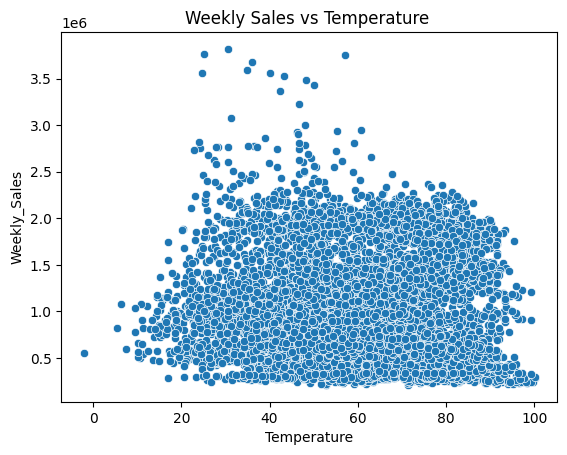

In [148]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df)
plt.title('Weekly Sales vs Temperature ')

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

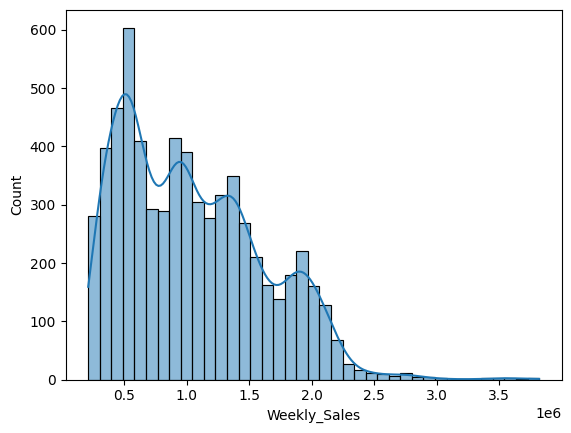

In [ ]:
sns.histplot(df['Weekly_Sales'],bins='auto',kde=True,)
#right skewed distribution

Text(0, 0.5, 'Total Weekly Sales')

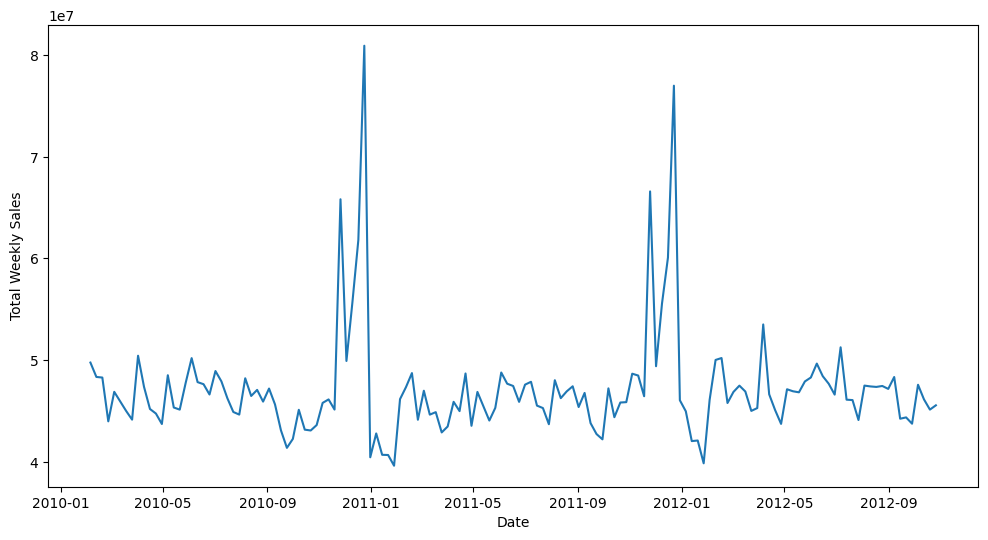

In [120]:

plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Date')['Weekly_Sales'].sum())
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")

Text(0, 0.5, 'Total Sales')

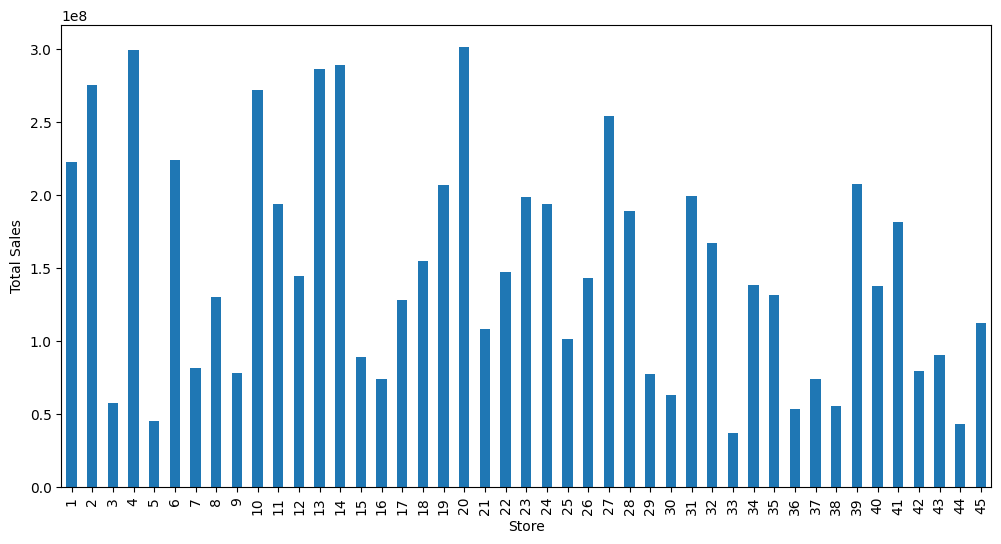

In [ ]:
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar', figsize=(12, 6))
plt.xlabel("Store")
plt.ylabel("Total Sales")

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

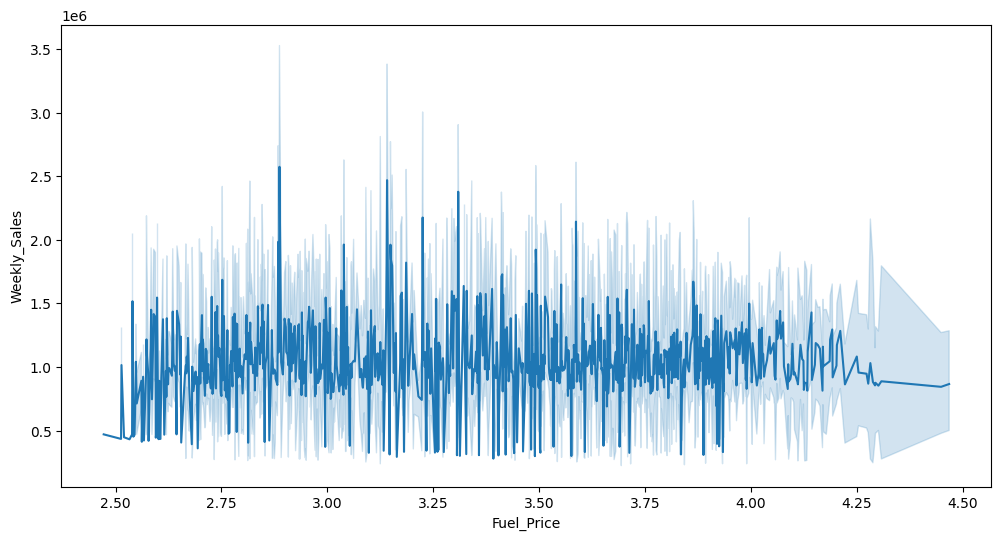

In [131]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fuel_Price', y='Weekly_Sales', data=df)


Text(0, 0.5, 'Average CPI')

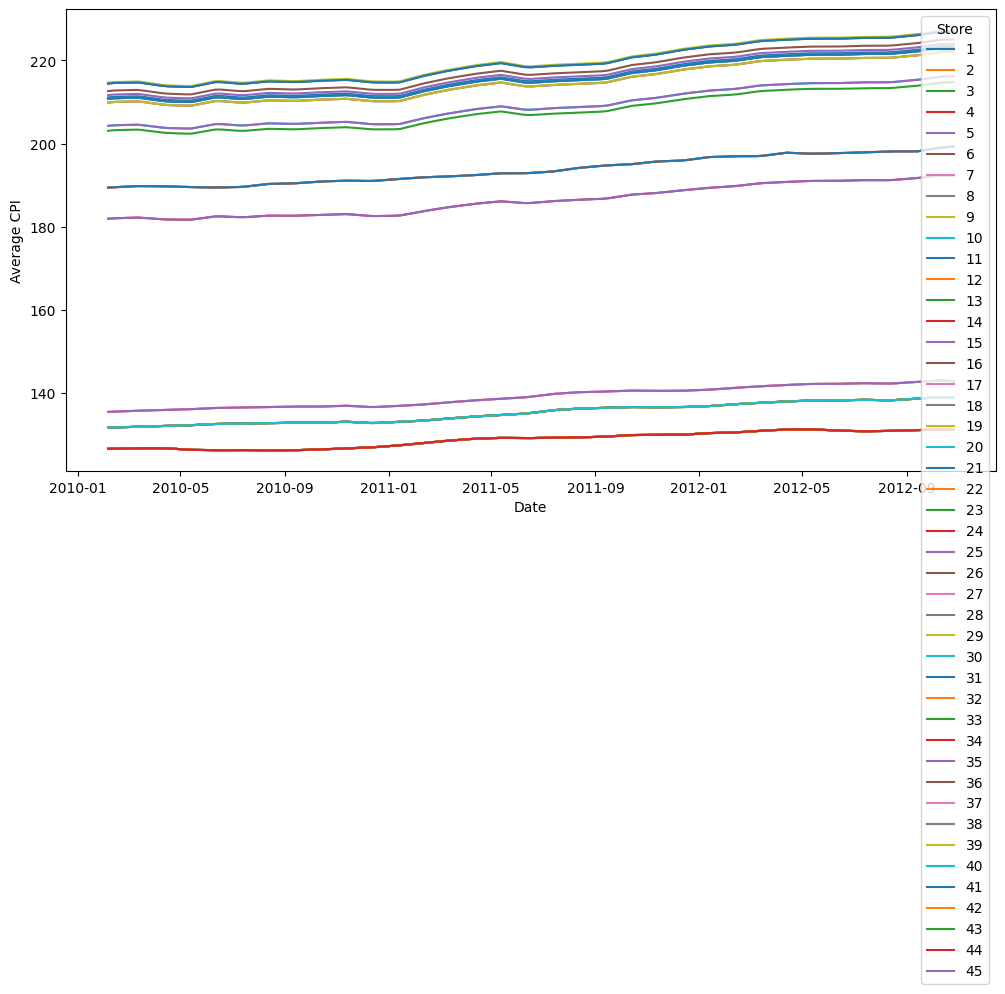

In [138]:
avg_cpi=df.groupby(['Date','Store'])['CPI'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_cpi, x='Date', y='CPI', hue='Store', palette='tab10')
plt.xlabel("Date")
plt.ylabel("Average CPI")


In [158]:
df['Sales_Level']=pd.qcut(df['Weekly_Sales'],q=5,labels=['Very Low','Low','Medium','High','Very High'])

Text(0.5, 1.0, 'Average Temperature by Sales Level')

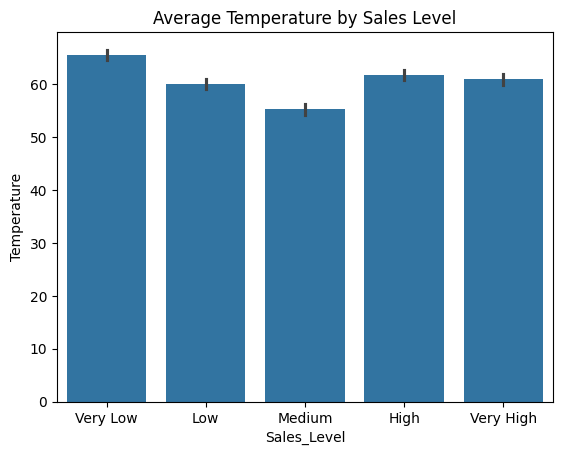

In [159]:
sns.barplot(x='Sales_Level', y='Temperature', data=df)
plt.title('Average Temperature by Sales Level')


Text(0.5, 1.0, 'Fuel Price Distribution by Sales Level')

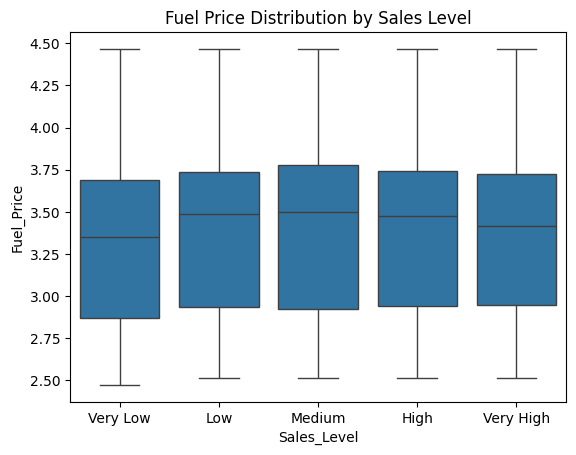

In [162]:
sns.boxplot(x='Sales_Level', y='Fuel_Price', data=df)
plt.title('Fuel Price Distribution by Sales Level')


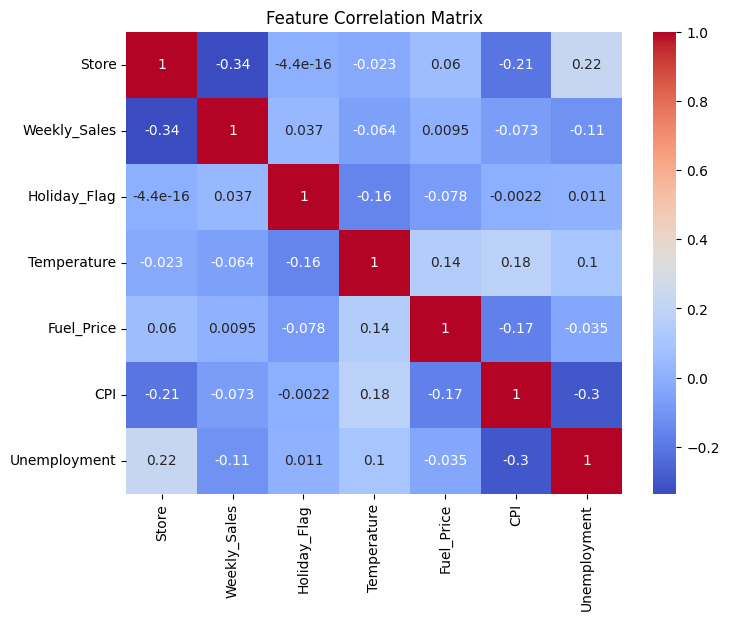

In [170]:
df_clean = df.select_dtypes(include=['number'])  # keep only numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
